# Assignment 01: 
# Exploring APIs and Interactive map in Python

In [1]:
# Obtain weather data from the OpenWeatherMap API

import requests

API_KEY = '0505edcaeb95ae57982da7555d79d52b'
CITY = 'Liverpool'
url = f'http://api.openweathermap.org/data/2.5/weather?q={CITY}&appid={API_KEY}'

response = requests.get(url) 
weather_data = response.json() 
print(weather_data)

{'coord': {'lon': -2.9779, 'lat': 53.4106}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 282.97, 'feels_like': 279.26, 'temp_min': 282.03, 'temp_max': 283.79, 'pressure': 1001, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 9.39, 'deg': 120, 'gust': 9.39}, 'clouds': {'all': 40}, 'dt': 1709568414, 'sys': {'type': 2, 'id': 2008599, 'country': 'GB', 'sunrise': 1709535125, 'sunset': 1709574921}, 'timezone': 0, 'id': 2644210, 'name': 'Liverpool', 'cod': 200}


In [2]:
# Process all the data
city = weather_data['name']
country = weather_data['sys']['country']
weather = weather_data['weather'][0]['description']

temp = weather_data['main']['temp']
feels_like = weather_data['main']['feels_like']
temp_min = weather_data['main']['temp_min']
temp_max = weather_data['main']['temp_max']
pressure = weather_data['main']['pressure']
humidity = weather_data['main']['humidity']
visibility = weather_data['visibility']
wind_speed = weather_data['wind']['speed']
clouds = weather_data['clouds']['all']


print(f'The weather in {city}, {country} is {weather}.')
print(f'The temperature is {temp}°C, but it feels like {feels_like}°C.')
print(f'The minimum temperature is {temp_min}°C and the maximum temperature is {temp_max}°C.')
print(f'The pressure is {pressure} hPa and the humidity is {humidity}%.')
print(f'The visibility is {visibility}m and the wind speed is {wind_speed}m/s.')
print(f'The cloud cover is {clouds}%.')


The weather in Liverpool, GB is scattered clouds.
The temperature is 282.97°C, but it feels like 279.26°C.
The minimum temperature is 282.03°C and the maximum temperature is 283.79°C.
The pressure is 1001 hPa and the humidity is 71%.
The visibility is 10000m and the wind speed is 9.39m/s.
The cloud cover is 40%.


In [3]:
# Show the weather data on a map with folium

import folium

# 假设这是利物浦的经纬度
latitude = 53.4084
longitude = -2.9916

# 创建一个地图对象
map_liverpool = folium.Map(location=[latitude, longitude], zoom_start=12)

# 创建一个标记，并添加到地图上
popup_content = f"The weather in {city}, {country} is {weather}.\\n"
popup_content += f"The temperature is {temp}°C, feels like {feels_like}°C.\\n"
popup_content += f"Min temp: {temp_min}°C, Max temp: {temp_max}°C.\\n"
popup_content += f"Pressure: {pressure} hPa, Humidity: {humidity}%.\\n"
popup_content += f"Visibility: {visibility}m, Wind speed: {wind_speed}m/s.\\n"
popup_content += f"Cloud cover: {clouds}%."

folium.Marker([latitude, longitude], popup=popup_content).add_to(map_liverpool)

# 展示地图
map_liverpool

## Future 5 days

In [20]:
import folium
import requests

url = f"http://api.openweathermap.org/data/2.5/forecast?q=Liverpool,uk&units=metric&appid={API_KEY}"
response = requests.get(url)
weather_data = response.json()

# 打印weather_data list
print(weather_data['list'])

[{'dt': 1709575200, 'main': {'temp': 9.67, 'feels_like': 6.05, 'temp_min': 7.61, 'temp_max': 9.67, 'pressure': 1001, 'sea_level': 1001, 'grnd_level': 998, 'humidity': 70, 'temp_kf': 2.06}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'clouds': {'all': 40}, 'wind': {'speed': 8.78, 'deg': 124, 'gust': 15.84}, 'visibility': 10000, 'pop': 0.05, 'sys': {'pod': 'n'}, 'dt_txt': '2024-03-04 18:00:00'}, {'dt': 1709586000, 'main': {'temp': 8.46, 'feels_like': 4.19, 'temp_min': 6.03, 'temp_max': 8.46, 'pressure': 1001, 'sea_level': 1001, 'grnd_level': 997, 'humidity': 74, 'temp_kf': 2.43}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'clouds': {'all': 60}, 'wind': {'speed': 9.94, 'deg': 126, 'gust': 17.8}, 'visibility': 10000, 'pop': 0.25, 'sys': {'pod': 'n'}, 'dt_txt': '2024-03-04 21:00:00'}, {'dt': 1709596800, 'main': {'temp': 7.7, 'feels_like': 4.18, 'temp_min': 6.71, 'temp_max': 7.7, 'pressure': 100

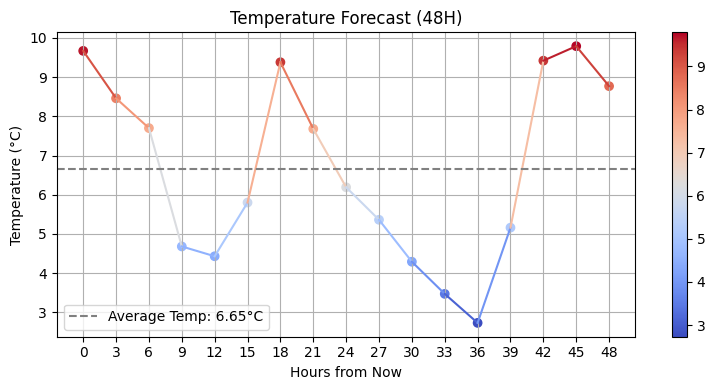

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

temperatures = [item['main']['temp'] for item in weather_data['list'][:17]]  # 取前48小时的数据
times = [item['dt_txt'] for item in weather_data['list'][:17]]

# 假设这是当前时间
current_time = datetime.strptime(weather_data['list'][0]['dt_txt'], '%Y-%m-%d %H:%M:%S')

# 计算每个时间点距当前时间的小时数
hours_from_now = [(datetime.strptime(t, '%Y-%m-%d %H:%M:%S') - current_time).total_seconds() / 3600 for t in times]

# 创建图表
plt.figure(figsize=(8, 4))

# 确保横坐标与数据点对齐
plt.xticks(hours_from_now)

# 计算平均温度
mean_temp = np.mean(temperatures)

# 创建颜色映射
norm = plt.Normalize(min(temperatures), max(temperatures))
cmap = plt.get_cmap("coolwarm")

# 绘制散点图
sc = plt.scatter(hours_from_now, temperatures, c=temperatures, cmap=cmap, norm=norm)

# 绘制每两个点之间的连线
for i in range(len(temperatures) - 1):
    x_values = [hours_from_now[i], hours_from_now[i + 1]]
    y_values = [temperatures[i], temperatures[i + 1]]
    avg_temp = np.mean([temperatures[i], temperatures[i + 1]])
    color = cmap(norm(avg_temp))
    plt.plot(x_values, y_values, color=color)

# 添加颜色条
cbar = plt.colorbar(sc)

# 隐藏y轴标签
# plt.gca().axes.get_yaxis().set_visible(False)

# 添加平均温度线
plt.axhline(y=mean_temp, color='grey', linestyle='--', label=f'Average Temp: {mean_temp:.2f}°C')

plt.title('Temperature Forecast (48H)')
plt.xlabel('Hours from Now')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()

# 保存图表
plt.tight_layout()
plt.savefig('temp_plot.png')



In [58]:
import base64
from folium import IFrame

# 将图片转换为Base64
encoded = base64.b64encode(open('temp_plot.png', 'rb').read()).decode()

# 创建一个IFrame对象
iframe = IFrame(f'<img src="data:image/png;base64,{encoded}">', width=850, height=450)
popup = folium.Popup(iframe, max_width=2650)

# 在地图上添加带有IFrame的标记
folium.Marker([53.4084, -2.9916], popup=popup).add_to(map_liverpool)

map_liverpool
